In [42]:
%config IPCompleter.greedy=True

In [43]:
import tensorflow

In [44]:
import keras

In [45]:
import matplotlib.pyplot as plt

In [46]:
from keras.datasets import mnist

In [47]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_test.shape

(10000, 28, 28)

In [50]:
y_train.shape

(60000,)

In [51]:
y_test.shape

(10000,)

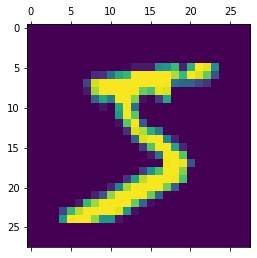

In [52]:
plt.matshow(x_train[0])

In [53]:
y_train[0]

5

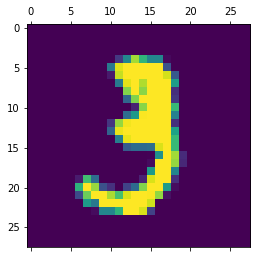

In [54]:
plt.matshow(x_train[10])

In [55]:
y_train[1]

0

In [72]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [73]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [74]:
x_train=x_train/255
x_test=x_test/255

In [75]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [76]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model=Sequential()

In [79]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [80]:
#input layer
model.add(Flatten())

In [81]:
#hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

In [82]:
#output layer
model.add(Dense(10,activation='softmax'))

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [84]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 14ms/step - loss: 0.5886 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2205 - accuracy: 0.9345
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1611 - accuracy: 0.9525
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1322 - accuracy: 0.9604
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1153 - accuracy: 0.9651
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0934 - accuracy: 0.9716
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0856 - accuracy: 0.9737
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0787 - accuracy: 0.9762
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [105]:
pred=model.predict(x_test)

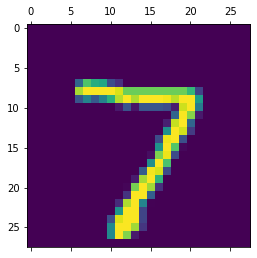

In [109]:
plt.matshow(x_test[0])

In [110]:
pred[0]

array([8.6173450e-06, 2.0358424e-08, 1.0949949e-04, 1.1639126e-03,
       7.6760213e-13, 8.6335041e-07, 6.4923720e-14, 9.9850488e-01,
       7.8276503e-07, 2.1157022e-04], dtype=float32)

In [111]:
pred[0].argmax()

7